# 0. Introduction
NIH released the chest X-ray [dataset](https://www.nih.gov/news-events/news-releases/nih-clinical-center-provides-one-largest-publicly-available-chest-x-ray-datasets-scientific-community)
Files are extracted in the **'data'** and and the images are extracted in the **'images'** folders.


In [ ]:
# !jt -t onedork -N -T -kl -f roboto -fs 115 -cursc r -cursw 4 -ofs 115 -cellw 100 % -altp -m 200

In [167]:
# # Download the 56 zip files in Images_png in batches
# import urllib

# # URLs for the zip files
# links = [
#     'https://nihcc.box.com/shared/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz',
#     'https://nihcc.box.com/shared/static/i28rlmbvmfjbl8p2n3ril0pptcmcu9d1.gz',
#     'https://nihcc.box.com/shared/static/f1t00wrtdk94satdfb9olcolqx20z2jp.gz',
#     'https://nihcc.box.com/shared/static/0aowwzs5lhjrceb3qp67ahp0rd1l1etg.gz',
#     'https://nihcc.box.com/shared/static/v5e3goj22zr6h8tzualxfsqlqaygfbsn.gz',
#     'https://nihcc.box.com/shared/static/asi7ikud9jwnkrnkj99jnpfkjdes7l6l.gz',
#     'https://nihcc.box.com/shared/static/jn1b4mw4n6lnh74ovmcjb8y48h8xj07n.gz',
#     'https://nihcc.box.com/shared/static/tvpxmn7qyrgl0w8wfh9kqfjskv6nmm1j.gz',
#     'https://nihcc.box.com/shared/static/upyy3ml7qdumlgk2rfcvlb9k6gvqq2pj.gz',
#     'https://nihcc.box.com/shared/static/l6nilvfa9cg3s28tqv1qc1olm3gnz54p.gz',
#     'https://nihcc.box.com/shared/static/hhq8fkdgvcari67vfhs7ppg2w6ni4jze.gz',
#     'https://nihcc.box.com/shared/static/ioqwiy20ihqwyr8pf4c24eazhh281pbu.gz'
# ]

# for idx, link in enumerate(links):
#     fn = 'images_%02d.tar.gz' % (idx+1)
#     print('downloading', fn, '...')
#     urllib.request.urlretrieve(link, fn)  # download the zip file
# print("Download complete. Please check the checksums")

## Loading Prerequisites and Libraries 

Standard Imports:  
Plotly is configured to run in the offline mode.  
Pandas is chosen to for manipulating csv files.  
Numpy is for the arithmetic applications.

Visualizations:  
Most of the visualizations are done via matplotlib, seaborn and plotly.   

Custom Functions:  
All additional functions and code are written and imported from the **eda_xray.py** file.

In [168]:
from jupyterthemes import jtplot
import shutil
import os
from eda_xray import load_xray
from itertools import chain
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # sets up plotting under plt
import matplotlib.cm as cm  # allows us easy access to colormaps
from IPython.core.interactiveshell import InteractiveShell
from IPython.core.display import display, HTML
import ipywidgets as widgets
from ipywidgets import interact
import plotly_express as px
import plotly.graph_objs as go
import plotly.offline
%matplotlib inline
sns.set_style('whitegrid')
sns.set_context("poster")
# import jtplot submodule from jupyterthemes

# currently installed theme will be used to
# set plot style if no arguments provided
# jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')
%load_ext autoreload
%autoreload 2
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('precision', 5)
InteractiveShell.ast_node_interactivity = "all"
# InteractiveShell.ast_node_interactivity = "last_expr"
widgets.ColorPicker(
    concise=False,
    description='Pick a color',
    value='blue',
    disabled=False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ColorPicker(value='blue', description='Pick a color')

There is a total of 112120 images on the NIH dataset.

In [169]:
# creating image location and looking for the number of the images
img_location = 'data/images'
imgs = [file for file in os.listdir(img_location) if file.endswith('.png')]
len(imgs)

112120

## Importing data and renaming/dropping columns

The function **load_xray** does the following:
1. imports the css
2. renames the columns to lower letter
3. drops the last empty column
4. adds a new columns caled **'path'** that has the x-rays *image*.png* location

In [4]:
data = 'data/Data_Entry_2017.csv'
df = load_xray(data)
df.sample(5)

,imgindex,label,followup,patientID,age,gender,viewposition,width,height,x,y,path
66636,00016484_009.png,No Finding,9,16484,5,F,PA,2992,2991,0.14300,0.14300,data/images/00016484_009.png
13413,00003490_003.png,No Finding,3,3490,57,F,AP,2500,2048,0.17100,0.17100,data/images/00003490_003.png
39843,00010409_000.png,Fibrosis,0,10409,62,F,PA,1733,1847,0.19431,0.19431,data/images/00010409_000.png
74933,00018379_004.png,Atelectasis,4,18379,59,M,PA,2992,2991,0.14300,0.14300,data/images/00018379_004.png
21368,00005699_002.png,No Finding,2,5699,36,F,PA,2500,2048,0.16800,0.16800,data/images/00005699_002.png


In [170]:
# df.age.describe()
# df[df.age > df.age.quantile(0.997)]
# df[df.age > 100]
# sns.distplot(df.age[df.age > df.age.quantile(0.997)], kde = False)

There are 836 different combinations of labeling among the x-rays.

## Unique pathologies of x-ray abnormalities and choosing a subset

There 836 unique values in the labels and these values have several different groupings of the pathologies. 

In [171]:
df.label.nunique()

15

If we don't the consider the multilabel abnormalities, we'd have 14 labels plus the *'No Finding'* classification.

Infiltration          9547
Atelectasis           4215
Effusion              3955
Nodule                2705
Pneumothorax          2194
Mass                  2139
Consolidation         1310
Pleural_Thickening    1126
Cardiomegaly          1093
Emphysema              892
Fibrosis               727
Edema                  628
Pneumonia              322
Hernia                 110
Name: label, dtype: int64


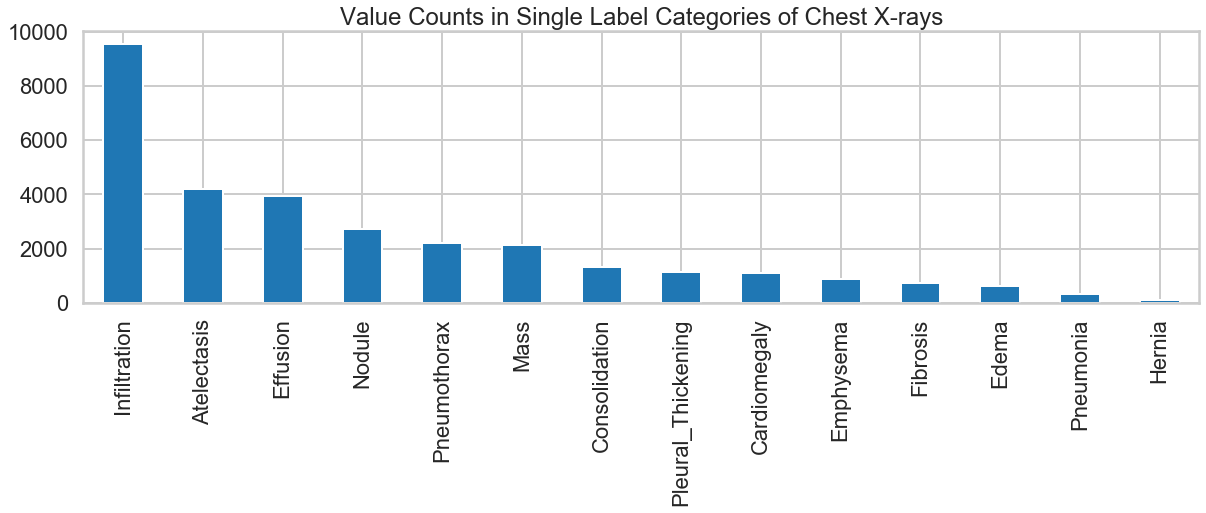

In [172]:
single_labels = ['Atelectasis', 'Consolidation', 'Infiltration', 'Pneumothorax',
                 'Edema', 'Emphysema', 'Fibrosis', 'Effusion', 'Pneumonia',
                 'Pleural_Thickening', 'Cardiomegaly', 'Nodule', 'Mass', 'Hernia']
print(df[df.label.isin(single_labels)].label.value_counts())

df[df.label.isin(single_labels)].label.value_counts().plot(kind='bar',
                                                           figsize=(20, 5),
                                                           title='Value Counts in Single Label Categories of Chest X-rays')

By Looking at the dataset we can see there's more than 60,000 values for the *'No Finding'* label.
To have a subset we randomly sample 10,000 values of this label and concat with the other single labels.

In [173]:
df_subset = pd.concat((df[df.label == 'No Finding'].sample(10000, random_state=42),
                       df[df.label.isin(single_labels)]))

No Finding            10000
Infiltration           9547
Atelectasis            4215
Effusion               3955
Nodule                 2705
Pneumothorax           2194
Mass                   2139
Consolidation          1310
Pleural_Thickening     1126
Cardiomegaly           1093
Emphysema               892
Fibrosis                727
Edema                   628
Pneumonia               322
Hernia                  110
Name: label, dtype: int64


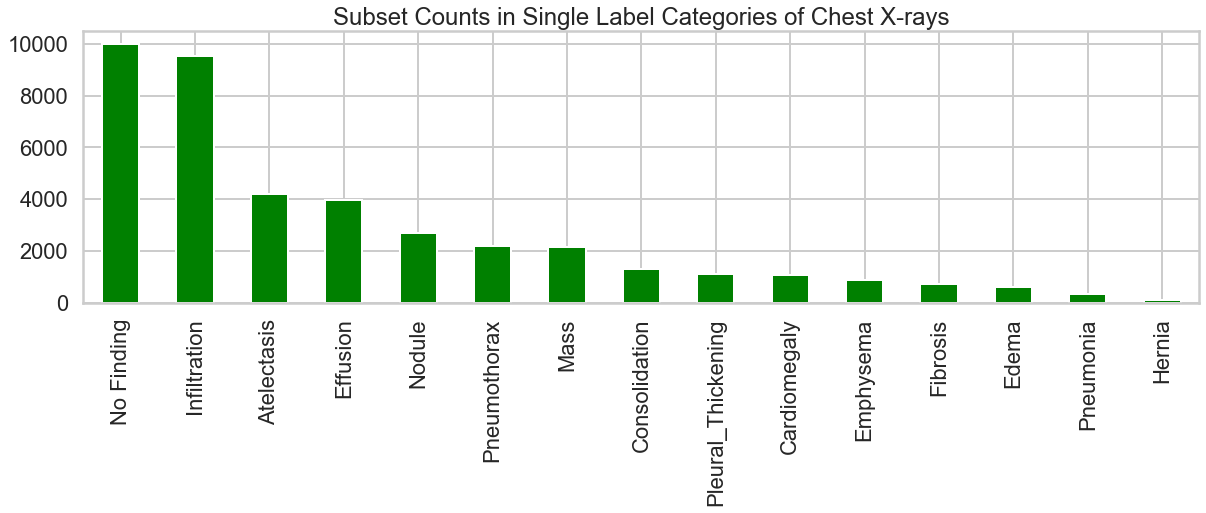

In [174]:
print(df_subset.label.value_counts())
df_subset.label.value_counts().plot(kind='bar',
                                    figsize=(20, 5),
                                    color='g',
                                    title='Subset Counts in Single Label Categories of Chest X-rays')

The created subset has a total of 40963 values, which close to a third of the original dataset. Thus in total we have chosen **%36.53** of the original dataframe. 

In [175]:
print('# of rows in the subset dataframe: ', df_subset.shape[0])
print('\n# of rows in the original dataframe: ', df.shape[0])
print('\npercentage subset of the original: ',
      df_subset.shape[0]/df.shape[0]*100)

# of rows in the subset dataframe:  40963

# of rows in the original dataframe:  40963

percentage subset of the original:  100.0


## Creating Categorical Variables

In [11]:
# create
cat_df = pd.get_dummies(df_subset,
                        columns=['label'],
                        prefix='',
                        prefix_sep='',
                        dtype=np.float64)

cat_df['label'] = df_subset.label
df_subset = cat_df

In [12]:
df_subset['target'] = df_subset.apply(
    lambda x: [x[single_labels].values], 1).map(lambda x: x[0])

In [13]:
# overwriting the df variable name with the df_subset for convention
df = df_subset

## Output to CSV & Pickle & HD5

## Split train, validation, and test data

In [14]:
from sklearn.model_selection import train_test_split

train_set, valid_set = train_test_split(df, test_size=4500,
                                        random_state=42,
                                        stratify=df.label)

train_set, test_set = train_test_split(train_set, test_size=4000,
                                       random_state=42,
                                       stratify=train_set.label)


print('training set values', train_set.shape)
print('validation set values', valid_set.shape)
print('testing set values', test_set.shape)
print('subset data values', df.shape)

training set values (32463, 28)
validation set values (4500, 28)
testing set values (4000, 28)
subset data values (40963, 28)


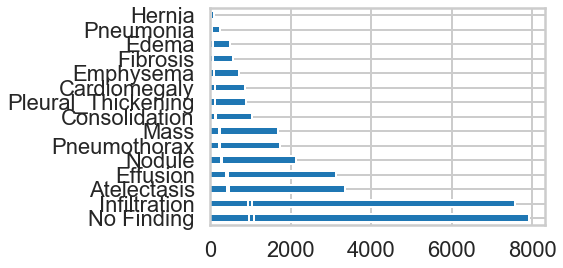

In [15]:
# looking at the normalization of the splits
for i in [train_set, valid_set, test_set]:
    i.label.value_counts().plot(kind='barh')

# Image Preprocessing

## Checking for contrast normality

In [16]:
# plotting function
# scikit image has some stuff - check them out on google

array([[116, 116, 122, ...,  93,  96,  96],
       [116, 116, 122, ...,  93,  96,  96],
       [116, 116, 122, ...,  93,  96,  96],
       ...,
       [109, 109, 112, ..., 117, 116, 116],
       [114, 114, 113, ..., 118, 118, 118],
       [114, 114, 113, ..., 118, 118, 118]], dtype=uint8)


## CLAHE - Contrast Limited Adaptive Histogram Equalization  

We apply the CLAHE [(Contrast Limited Adaptive Histogram Equalization)](https://en.wikipedia.org/wiki/Adaptive_histogram_equalization) method, which is a popular image processing method to improve contrast in images and limit the noise amplification of the regular adaptive method.


In [165]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from skimage.exposure import equalize_adapthist

def CLAHE(img):
    img = img*2-1
    img = equalize_adapthist(img, clip_limit=0.03)
    return img


## Checking for Contrast Normality 

In [166]:
# from skimage import data, img_as_float
# from skimage import exposure
# from skimage import data, img_as_float
# from skimage import exposure
# plt.rcParams['font.size'] = 8
# img = data.moon()
# img
# # matplotlib.rcParams['font.size'] = 8


# def plot_img_and_hist(image, axes, bins=256):
#     """Plot an image along with its histogram and cumulative histogram.

#     """
# #     image = img_as_float(image)
#     ax_img, ax_hist = axes
#     ax_cdf = ax_hist.twinx()

#     # Display image
#     ax_img.imshow(image, cmap=plt.cm.gray)
#     ax_img.set_axis_off()

#     # Display histogram
#     ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
#     ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
#     ax_hist.set_xlabel('Pixel intensity')
#     ax_hist.set_xlim(0, 1)
#     ax_hist.set_yticks([])

#     # Display cumulative distribution
#     img_cdf, bins = exposure.cumulative_distribution(image, bins)
#     ax_cdf.plot(bins, img_cdf, 'r')
#     ax_cdf.set_yticks([])

#     return ax_img, ax_hist, ax_cdf

# img = tensor_1
# # Contrast stretching
# p2, p98 = np.percentile(img, (2, 98))
# img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# # Equalization
# img_eq = exposure.equalize_hist(img)

# # Adaptive Equalization
# img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# # Display results
# fig = plt.figure(figsize=(8, 5))
# axes = np.zeros((2, 4), dtype=np.object)
# axes[0, 0] = fig.add_subplot(2, 4, 1)
# for i in range(1, 4):
#     axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
# for i in range(0, 4):
#     axes[1, i] = fig.add_subplot(2, 4, 5+i)

# ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
# ax_img.set_title('Low contrast image')

# y_min, y_max = ax_hist.get_ylim()
# ax_hist.set_ylabel('Number of pixels')
# ax_hist.set_yticks(np.linspace(0, y_max, 5))

# ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
# ax_img.set_title('Contrast stretching')

# ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
# ax_img.set_title('Histogram equalization')

# ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
# ax_img.set_title('Adaptive equalization')

# ax_cdf.set_ylabel('Fraction of total intensity')
# ax_cdf.set_yticks(np.linspace(0, 1, 5))

# # prevent overlap of y-axis labels
# fig.tight_layout()
# plt.show()

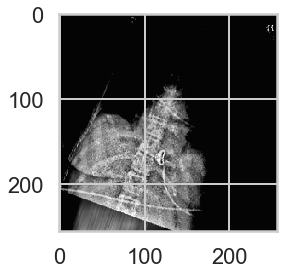

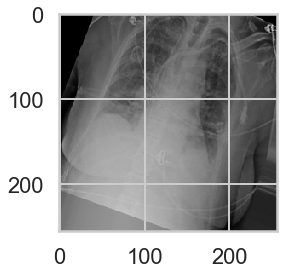

In [157]:
tensor_1 = images_tr[0,:,:,:]
image = CLAHE(tensor_1)
plt.imshow(image)
plt.show()
plt.imshow(tensor_1)


# Modeling

## Image Generation

In [127]:
# preprocessing_function=CLAHE,
img_gen = ImageDataGenerator(rescale = 1./255.,
                             shear_range=0.1,
                             zoom_range=0.2,
                             rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1)
#                              preprocessing_function=CLAHE,

## Baseline Modeling

In [128]:
test_datagen = ImageDataGenerator(preprocessing_function=CLAHE)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_set,
    directory='',
    x_col="path",
    y_col="label",
    target_size=(256, 156),
    seed=42,
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb')

Found 4000 validated image filenames belonging to 15 classes.


In [129]:
train_generator = img_gen.flow_from_dataframe(
    dataframe=train_set,
    directory='',
    x_col="path",
    y_col="label",
    target_size=(256, 256),
    seed=42,
    class_mode='categorical',
    color_mode='rgb',
    batch_size=32)

Found 32463 validated image filenames belonging to 15 classes.


In [130]:
images_tr, labels_tr = next(train_generator)

In [131]:
images_tr.shape

(32, 256, 256, 3)

In [132]:
labels_tr

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.

In [133]:
tensor_1 = images_tr[0,:,:,:]

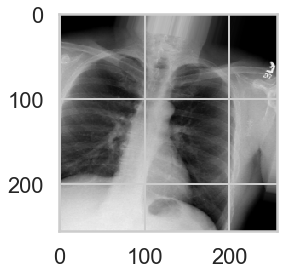

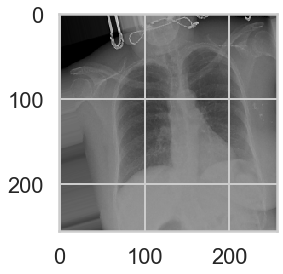

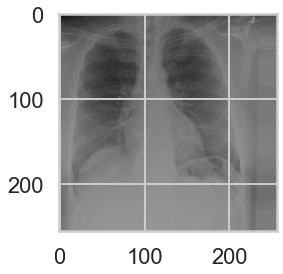

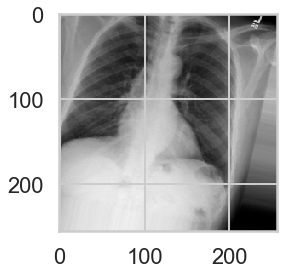

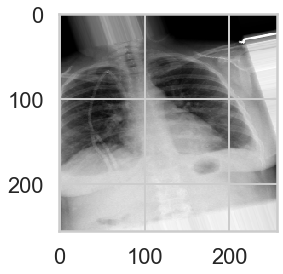

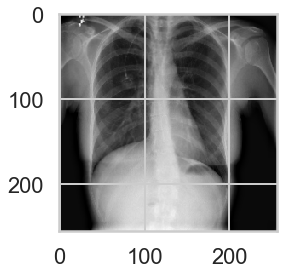

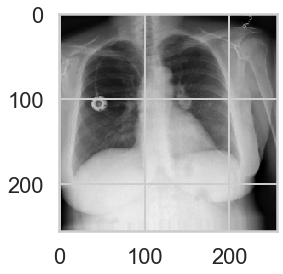

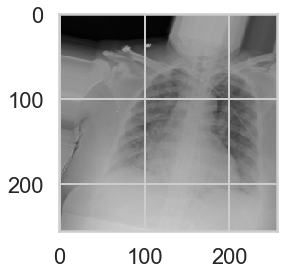

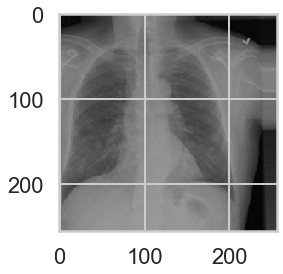

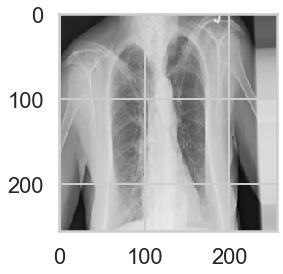

In [134]:
%matplotlib inline
import matplotlib.pyplot as plt
for i in range(20, 30):
    plt.imshow(images_tr[i,:,:,:])
    plt.show()

In [36]:
validation_generator = img_gen.flow_from_dataframe(
    dataframe=valid_set,
    directory='',
    x_col="path",
    y_col="label",
    target_size=(128, 128),
    seed=42,
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb')

Found 4500 validated image filenames belonging to 15 classes.


In [37]:
# Import relevant libraries
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.models import Sequential

In [38]:
# #  Create CNN model
# # Will use a combination of convolutional, max pooling, and dropout layers for this purpose
# model = Sequential()

# model.add(Conv2D(filters = 8, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = test_X.shape[1:]))
# model.add(MaxPooling2D(pool_size = 2))
# model.add(Dropout(0.2))

# model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
# model.add(MaxPooling2D(pool_size = 2))
# model.add(Dropout(0.2))
          
# model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
# model.add(MaxPooling2D(pool_size = 2))
# model.add(Dropout(0.2))

# model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
# model.add(MaxPooling2D(pool_size = 2))
# model.add(Dropout(0.2))
          
# model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
# model.add(MaxPooling2D(pool_size = 3))
# model.add(Dropout(0.2))

# # add in fully connected dense layers to model, then output classifiction probabilities using a softmax activation function
# model.add(Flatten())
# model.add(Dense(500, activation = 'relu'))
# model.add(Dropout(0.2))
# model.add(Dense(len(dummy_labels), activation = 'softmax'))

# # compile model, run summary
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()

In [42]:
# # Create CNN baseline_model
# # Will use a combination of convolutional, max pooling, and dropout layers for this purpose
model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (128, 128, 3)))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))
          
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))
          
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 3))
model.add(Dropout(0.2))

# add in fully connected dense layers to model, then output classifiction probabilities using a softmax activation function
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(15, activation = 'softmax'))

# compile model, run summary
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 128, 128, 8)       224       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 8)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 16)        1168      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)       

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=32,
                              epochs=50,
                              validation_data=validation_generator,
                              validation_steps=32)

Epoch 1/50
32/32 [==============================] - 160s 5s/step - loss: 2.2723 - accuracy: 0.2529 - val_loss: 2.4156 - val_accuracy: 0.2383
Epoch 2/50
32/32 [==============================] - 138s 4s/step - loss: 2.2326 - accuracy: 0.2490 - val_loss: 2.3634 - val_accuracy: 0.2666
Epoch 3/50
32/32 [==============================] - 143s 4s/step - loss: 2.2653 - accuracy: 0.2284 - val_loss: 2.3387 - val_accuracy: 0.2666
Epoch 4/50
31/32 [============================>.] - ETA: 1s - loss: 2.2153 - accuracy: 0.2601

KeyboardInterrupt: 

In [ ]:
# # set up a checkpoint for model training
# # https://keras.io/callbacks/
# from tensorflow.keras.callbacks import ModelCheckpoint

# checkpointer = ModelCheckpoint(filepath='weights.best.{epoch:02d}-{val_loss:.2f}.hdf5', verbose=1, save_best_only = True)
# callbacks_list = [checkpointer]

In [ ]:
# ### Useful
# model.save('./model.h5') # Save your weights and computational graph
# from keras.models import load_model
# load_model('./model.h5') # loading the saved model from above

In [ ]:
# Fit the model!
# Note: This first model will be fitted very quickly, will fit a higher accuracy modelthat requires more training time after this
# Documentation: https://keras.io/models/model/
baseline_history = baseline_model.fit_generator(train_generator,
                                                steps_per_epoch=32,
                                                epochs=50,
                                                validation_data=validation_generator,
                                                validation_steps=32)

# How I decided which fit function to use
# model.fit_generator() v. model.fit() - https://datascience.stackexchange.com/questions/34444/what-is-the-difference-between-fit-and-fit-generator-in-keras
# 2nd good example: https://medium.com/difference-engine-ai/keras-a-thing-you-should-know-about-keras-if-you-plan-to-train-a-deep-learning-model-on-a-large-fdd63ce66bd2
# Basically, for large data-sets like this one, it's best-practice to use model.fit_generator()
# This is because i) dataset can't be loaded into memory all at once, ii) we're already doing image augmentation, so this solution meshes nicely
# Takeaway - use model.fit_generator() for this dataset

## Baseline Model Save 

In [ ]:
# baseline_model.evaluate_generator()

In [ ]:
baseline_model.save('model.h5')
# from keras.models import load_model
# baseline_model = load_model('model.h5') # loading the saved model from above

## Baseline Model Accuracy and ROC

In [ ]:

# # classic CNN looks like this:
# # input>conv>reLU>conv>reLU>pool>relu>conv>pool>fullyconnected
# # common technique to avoid overfitting is to use dropout filters. it uses a random set of activation filters
# # pooling reduces the dimensionality of each feature map but keeps the largest feature
# # reLU replace all negative values with zero
# # our filter is our feature identifier or basically the weights we assign
# # all you have to do is to create a small filter and convert it to an array

In [ ]:
x2_model = Sequential()

x2_model.add(Conv2D(filters=16,
                    kernel_size=3,
                    padding='same',
                    activation='relu',
                    input_shape=(256, 256, 1)))


x2_model.add(MaxPooling2D(pool_size=2))
x2_model.add(Dropout(0.2))

x2_model.add(Conv2D(filters=32, kernel_size=3,
                    padding='same', activation='relu'))

x2_model.add(MaxPooling2D(pool_size=2))
x2_model.add(Dropout(0.2))

x2_model.add(Conv2D(filters=64, kernel_size=3,
                    padding='same', activation='relu'))
x2_model.add(Conv2D(filters=64, kernel_size=3,
                    padding='same', activation='relu'))
x2_model.add(MaxPooling2D(pool_size=2))
x2_model.add(Dropout(0.2))

x2_model.add(Conv2D(filters=128, kernel_size=3,
                    padding='same', activation='relu'))
x2_model.add(Conv2D(filters=128, kernel_size=3,
                    padding='same', activation='relu'))
x2_model.add(MaxPooling2D(pool_size=2))
x2_model.add(Dropout(0.2))

x2_model.add(Conv2D(filters=256, kernel_size=3,
                    padding='same', activation='relu'))
x2_model.add(Conv2D(filters=256, kernel_size=3,
                    padding='same', activation='relu'))
x2_model.add(MaxPooling2D(pool_size=3))
x2_model.add(Dropout(0.2))

# add in fully connected dense layers to x2_model, then output classifiction probabilities using a softmax activation function
x2_model.add(Flatten())
x2_model.add(Dense(256, activation='relu'))
x2_model.add(Dropout(0.2))
x2_model.add(Dense(15, activation='softmax'))

# compile x2_model, run summary
x2_model.compile(optimizer='adam', loss='categorical_crossentropy',
                 metrics=['accuracy'])
x2_model.summary()

In [ ]:
x2_history = x2_model.fit_generator(train_generator,
                                                steps_per_epoch=32,
                                                epochs=50,
                                                validation_data=validation_generator,
                                                validation_steps=32)

In [ ]:
# create validation set from the training set.


# make sure to batch normalize & renormalize across all the inputs

# smaller batch size (32) leads to much better results